<h1><center><strong>CX 4803<br><br>Homework 2</strong></center></h1>
<h3><center><i>Dylan Both</i></center></h3>

In [60]:
# imports
import csv
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
import math
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from matplotlib.text import OffsetFrom

## Problem 1:

### 1(a)

Our estimate of the noise variance for a d-dimensional linear regression with n observations is 
\begin{align}
\hat{\sigma}^2&=\frac{\text{RSS}(\hat{w})}{n-(d+1)}.
\end{align}
If our noise follows $N(0, \sigma^2)$, we know that 
\begin{align}
\hat{\sigma}^2(n-(d+1))\sim\sigma^2X_{n-(d+1)}^2
\end{align}

Rewrite our estimate of the noise variance as 
\begin{align}
\frac{\text{RSS}(\hat{w})}{n-(d+1)}&=\frac{\hat{\sigma}^2(n-(d+1))}{n-(d+1)}.
\end{align}

Then,
\begin{align}
\frac{\text{RSS}(\hat{w})}{n-(d+1)}&\sim\frac{\sigma^2}{n-(d+1)}\cdot X_{n-(d+1)}^2.
\end{align}

Let f_{v}(x) denote the probability density function of $X_{v}^2$. Then the probability density function of our noise estimate is\begin{align}\text{pdf}\left(\hat{\sigma^2}\right)&=\frac{\sigma^2}{n-(d+1)}\cdot f_{n-(d+1)}(x).\end{align}

This has mean \begin{align}
\frac{\sigma^2}{n-(d+1)}\cdot (n-(d+1))&=\sigma^2,
\end{align}
and peak
\begin{align}
\frac{\sigma^2}{n-(d+1)}\cdot(n-(d+1)-2)&=\sigma^2-\frac{2\sigma^2}{n-(d+1)}.
\end{align}

### 1(b):
Since $u_{i}$ is a normally distributed random variable with mean $\bar{u}$ and $\bar{u}$ is a constant, $u_{i}-\bar{u}$ is a normally distributed random variable with mean $0$ and variance $\sigma^2$. Therefore, 
$\frac{1}{\sigma^2}\sum_{i=1}^{n}(u_{i}-\bar{u})$ is a Chi-Squared random variable with mean $n$. Then the probability density function of $\frac{1}{n-1}\sum_{i=1}^{n}(u_{i}-\bar{u})=\frac{\sigma^2}{n-1}\cdot\frac{1}{\sigma^2}\sum_{i=1}^{n}(u_{i}-\bar{u})$ is $\frac{\sigma^2}{n-1}f_{n}(x)$. This has mean $\frac{\sigma^2\cdot n}{n-1}$ and peak $\frac{\sigma^2\cdot (n-2)}{n-1}$.

To find the probability density function of $\frac{1}{n}\sum_{i=1}^{n}u_{i}^2$, we expand the sum.
\begin{align}
\frac{1}{n}\sum_{i=1}^{n}u_{i}^2&=\frac{1}{n}\sum_{i=1}^{n}\left((u_{i}-\bar{u})^2+2u_{i}\bar{u}_\bar{u}^2\right)\\
&=\frac{1}{n}\sum_{i=1}^{n}(u_{i}-\bar{u})^2 + \frac{2\bar{u}}{n}\sum_{i=1}^{n}u_{i}-\bar{u}^2\\
&=\frac{1}{n}\sum_{i=1}^{n}(u_{i}-\bar{u})^2+2\bar{u}^2-\bar{u}^2\\
&=\frac{1}{n}\sum_{i=1}^{n}(u_{i}-\bar{u})^2+\bar{u}^2.
\end{align}
As shown above, $\sum_{i=1}^{n}(u_{i}-\bar{u})^2$ has the Chi-Squared distribution with mean $\sigma^2\cdot n$. Then $\frac{1}{n}\sum_{i=1}^{n}(u_{i}-\bar{u})^2+\bar{u}^2$ is a scaled Chi_Square distribution shifted over by $\bar{u}^2$. The probability density function of $\frac{1}{n}\sum_{i=1}^{n}(u_{i}-\bar{u})^2+\bar{u}^2$ is
$\frac{\sigma^2}{n}f_{n}(x)+\bar{u}^2$. This has mean $\frac{\sigma^2}{n}\cdot n+\bar{u}^2=\sigma^2+\bar{u}^2$ and peak $\frac{\sigma^2\cdot(n-2)}{n}+\bar{u}^2$.



### 1(c):
For my numerical experiment, I create a linear function of some $x_{i}$ and add some Gaussian noise with variance of my choosing. For some set of $x_{i}$, I generate $y_{i}$ values using my function and adding noise. 
Then, I fit a linear model to the generated data and get predictions for the $y_{i}$. Using these predictions, I calculate the RSS. Finally I calculate the statistics 
\begin{align}
&\frac{\text{RSS}(\hat{w})}{n-(d+1)},\\
&\frac{1}{n-1}\sum_{i=1}^{n}(u_{i}-\bar{u})^2, \text{ and}\\
&\frac{1}{n}\sum_{i=1}^{n}\bar{u}^2.
\end{align}
I repeat this many times and plot histograms of the results. For each of the three histograms, I overlay the Chi-Square distribution for comparison. For simplicity, I chose a 1-dimensional model.

In [10]:
# set sample size
n = 1000
# set number of samples
ns = 500

# create the true function of x
fun = lambda x : 20 + 12.5*x

# initiate lists to store statistics
rss_list = []
u_bar_list = []
u_i_list = []

# do experiment ns times
for i in range(ns):
    # create x_i data
    x = np.random.rand(n)
    # get Gaussian noise with variance 0.1
    noise = np.random.normal(0,math.sqrt(0.1), n)
    u_bar = np.mean(noise)

    # get y_i data
    y_i = fun(x) + noise

    # fit a model
    X = np.c_[np.ones(n), x]
    w = linalg.lstsq(X, y_i)[0]

    # make predictions
    y_hat = (w.dot(X.T))

    # get residuals
    r = y_i - y_hat

    # calculate RSS
    rss = np.sum(np.square(r))

    # get statistics
    rss_stat = rss / (n-2)
    u_bar_stat = np.sum(np.square(noise - u_bar)) / (n-1)
    u_i_stat = np.sum(np.square(noise)) / n
    
    # add to lists
    rss_list.append(rss_stat)
    u_bar_list.append(u_bar_stat)
    u_i_list.append(u_i_stat)

[Text(0.5, 1.0, '$\\frac{RSS(\\hat{w})}{n-(d+1)}$')]

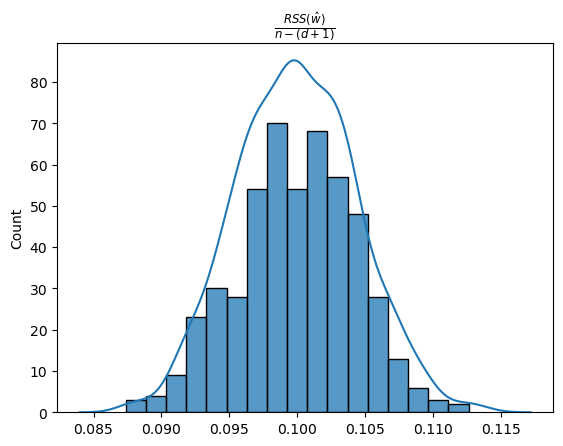

In [73]:
# plot unbiased estimate from part (a) along with the pdf of the associated translation of the Chi-Square distribution
rv = np.random.chisquare(n-2, n)
rv = (0.1/(n-2))*rv
sns.histplot(rss_list)
sns.kdeplot(rv).set(title='$\\frac{RSS(\hat{w})}{n-(d+1)}$')

The experiment confirms the first expression since the resulting histograms appears like a translation of the Chi-Squared distribution with $n-(d+1)=n-2$ degrees of freedom that has been multiplied by $\frac{\sigma^2}{n-2}=0.1$. 

[Text(0.5, 1.0, '$\\frac{1}{n-1}\\sum_{i=1}^{n}(u_{i}-\\bar{u})^2$')]

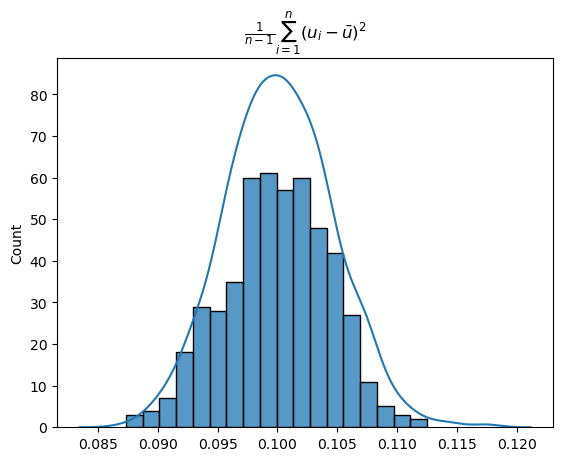

In [76]:
# plot the first esimate from part (b) along with the pdf of the associated translation of the Chi-Square distribution
rv = np.random.chisquare(n, n)
rv = (0.1/(n-1))*rv
sns.histplot(u_bar_list)
sns.kdeplot(rv).set(title='$\\frac{1}{n-1}\\sum_{i=1}^{n}(u_{i}-\\bar{u})^2$')

This histogram confirms our second equation. The pdf displayed is of $\frac{\sigma^2}{n-1}$ times the Chi-Squared distribution with $n$ degrees of freedom. Our histogram appears to follow this ditribution as desired.

[Text(0.5, 1.0, '$\\frac{1}{n}\\sum_{i=1}^{n}u_{i}^2$')]

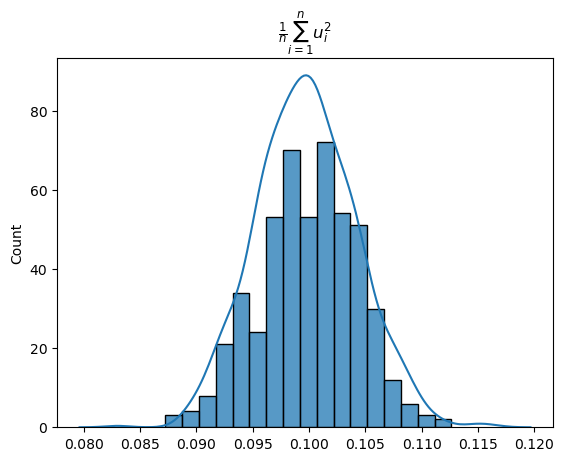

In [79]:
# plot the second esimate from part (b) along with the pdf of the associated translation of the Chi-Square distribution
rv = np.random.chisquare(n, n)
rv = (0.1/(n))*rv - u_bar**2
sns.histplot(u_i_list)
sns.kdeplot(rv).set(title='$\\frac{1}{n}\\sum_{i=1}^{n}u_{i}^2$')

This histogram confirms our final equation. The pdf displayed is of $\frac{\sigma^2}{n}$ times the Chi-Squared distribution with $n$ degrees of freedom shifted to the right by $\bar{u}^2$. Our histogram appears to follow this ditribution as desired.

### 1(d):
Since our $\bar{u}$ is incredibly small and our $n$ large, the mean and peak of the second and third statistic should be inperceivably different than $\sigma^2=0.1$. Therefore, in this case the three estimates are fairly similar. However, the differences that exists can be explained as follows:

The first statistic varies from the other two not only as a result of a difference in the degrees of freedom, but also in the fact that it is directly tied to the residuals rather than the noise. The second two statistics are tied directly to the noise, but only the first of these has mean zero. The last statistic is not only a shift of the second, but it also has one less degree of freedom. 

## Problem 2:

### 2(a):
Let $f(x_{i};\hat{w})=\hat{w_{0}}+\hat{w_{1}}x_{i}+\hat{w_{2}}x_{i}^2+...+\hat{w_{m}}x_{i}^m$. Then $y_{i}=f(x_{i};\hat{w})+u_{i}$. Since the $u_{i}\sim N(0,\hat{\sigma}^2)$, $y_{i}\sim N(f(x_{i};\hat{w}), \hat{\sigma}^2)$. Then,
\begin{align}
p(y_{i}|x_{i},\hat{w}, \hat{\sigma}^2)&= N(y_{i}|f(x_{i};\hat{w}),\hat{\sigma}^2)\\
&=\frac{1}{(2\pi\hat{\sigma}^2)^{\frac{1}{2}}}\cdot \exp\left(-\frac{1}{2\hat{\sigma}^2}(y_{i}-f(x_{i};\hat{w}))^2\right)
\end{align}

### 2(b):
The joint likelihood function for all observations of the $y_{i}$ is
\begin{align}
p(Y|x_{i},\hat{w}, \hat{\sigma}^2)&=\prod_{i=1}^{n}\frac{1}{(2\pi\hat{\sigma}^2)^{\frac{1}{2}}}\cdot \exp\left(-\frac{1}{2\hat{\sigma}^2}(y_{i}-f(x_{i};\hat{w}))^2\right)\\
&=(2\pi\hat{\sigma}^2)^{\frac{-n}{2}}\cdot \exp\left(-\frac{1}{2\hat{\sigma}^2}\sum_{i=1}^{n}(y_{i}-f(x_{i};\hat{w}))^2\right).
\end{align}

Since this likelihood function is unstable in behavior for large n, we take the negative log of this the likelihood function. The negative log-likelihood function is
\begin{align}
\frac{n}{2}\ln{(2\pi)}+\frac{n}{2}\ln{(\hat{\sigma}^2)}+\frac{1}{2\hat{\sigma}^2}\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2.
\end{align}
Since we took the negative of the log-likelihood function, we are interested in minimizing this function rather than maximizing it. To find our parameter $\hat{\sigma}^2$, we take set the derivative of the negative log-likelihood equal to zero and solve. Thus,
\begin{align}
\frac{n}{\hat{\sigma}^2}-\frac{1}{\hat{\sigma}^3}\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2&=0\\
\hat{\sigma}_{\text{MLE}}^2&=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2
\end{align}
is our maximum likelihood estimate for the noise variance.

The maximum likelihood estimate for $\hat{w}$ is obtained by taking the $\hat{w}$ associated with the function $f(x_{i};\hat{w})$ that minimizes our negative log-likelihood function. Clearly, this reduces to minimizing $\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2$. Therefore,
$\hat{w}_{\text{MLE}}$ is the same as the OLS estimate for $\hat{w}$. This is obtained by solving the system
$$y=X\hat{w}$$
where $y$ is the vector containing each $y_{i}$ observation, and $X$ is the matrix
$$X=\begin{bmatrix}
1&x_1&x_{1}^2&\dots &x_{1}^m\\
1&x_2&x_{2}^2&\dots &x_{2}^m\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1&x_n&x_{n}^2&\dots &x_{n}^m
\end{bmatrix}.$$

### 2(c):
In the code below, I read in the provided data, and fit a polynomial regression of order 5 to this data according to the above parameter estimates.

In [77]:
# read in data
x, y = np.loadtxt('hw2_q2.csv', delimiter=',', usecols=(0,1), unpack=True, dtype=float)
# add the column of ones to the x observations and add the higher order terms
X = np.c_[np.ones(len(x)), x, x**2, x**3, x**4, x**5]

# solve the system
w = linalg.lstsq(X, y)[0]

From this model, we obtain the weights:<br>
<ul>
    <li>$\hat{w}_{0}=22.5367$</li>
    <li>$\hat{w}_{1}=-27.9654$</li>
    <li>$\hat{w}_{3}=11.4449$</li>
    <li>$\hat{w}_{4}=-17.9121$</li>
    <li>$\hat{w}_{5}=0.0841$</li>
    <li>$\hat{w}_{6}=0.0012$</li>
</ul>
This gives us the equation
$$\hat{y}_{i}=22.5367-27.9654x_{i}+11.4449x_{i}^2-17.9121x_{i}^3+0.0841x_{i}^4+0.0012x_{i}^5$$.

### 2(d):
Our unbiased noise variance estimator is
$$\hat{\sigma}_{\text{unbiased}}^2=\frac{\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2}{n-2}=125.1310,$$
and our MLE estimator is (as shown above)
$$\hat{\sigma}_{\text{MLE}}^2=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-f(x_{i};\hat{w})\right)^2=122.6284.$$
Based on these estimates, I will use $\hat{\sigma}^2$ values ranging from $120$ to $130$ and plot the joint likelihood function
\begin{align}
p(Y|x_{i}, \hat{w}, \hat{\sigma}^2)&=(2\pi\hat{\sigma}^2)^{\frac{-n}{2}}\cdot \exp\left(\frac{-1}{2\hat{\sigma}^2}RSS(\hat{w})\right)
\end{align}
obtained in part (b) for this range of $\hat{\sigma}^2$ values.

In [78]:
# get y_i predictions
y_hat = (w.dot(X.T))
# get the RSS
rss = np.sum(np.square(y-y_hat))
# get noise variance estimates
unb_est = rss / (len(y)-2)
MLE_est = rss /len(y)

# create the joint likelihood function
joint_ll = lambda x : (2*math.pi*x)**(-len(y)/2)*math.exp((-1/(2*x))*rss)

# define sigma^2 values to use for plot
sig_list = [i for i in range(120,131)]

# initiate a list to store likelihood values
ll_list = []
# loop through sigma^2 values
for sig in sig_list:
    # get the joint likelihood for each sigma^2
    likelihood = joint_ll(sig)
    ll_list.append(likelihood)
    
print(f'unbiased estimate: {unb_est}')
print(f'MLE estimate: {MLE_est}')

unbiased estimate: 125.1309949104759
MLE estimate: 122.62837501226639


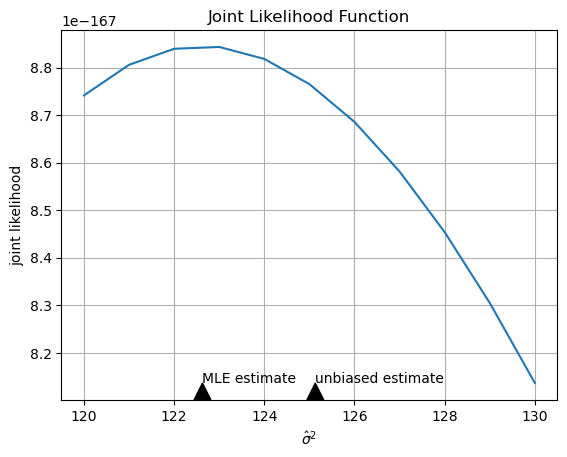

In [95]:
# create plot
plt.plot(sig_list, ll_list)
plt.annotate('MLE estimate', 
            xy=(MLE_est, min(ll_list)), 
            xytext=(MLE_est, min(ll_list)), 
            arrowprops = dict(facecolor='black', shrink=0.05))
plt.annotate('unbiased estimate', 
            xy=(unb_est, min(ll_list)), 
            xytext=(unb_est, min(ll_list)), 
            arrowprops = dict(facecolor='black', shrink=0.05))
plt.title('Joint Likelihood Function')
plt.ylabel('joint likelihood')
plt.xlabel('$\\hat{\\sigma}^2$')
plt.grid(visible=True)
plt.show()

### 2(e):
Since the unbiased estimate has a slightly smaller denominator due to Bessel's correction, the unbiased estimate of the nosie variance is larger in magnitude than the MLE estimate. The joint likelihood is higher for the MLE nosie variance estimate than it is for the unbiased estimate.

## Problem 3:


### 3(a):
To obtain my randomized train test split, I randomly shuffle the x and y observations, then take the first half of the shuffled array for my training data, and the second half as my testing data. I then use ten iterations to fit polynomial regressions of each degree from 1 to 10 and calculate both the training and testing MSE for each regression. I store these values in lists and then plot.

In [56]:
# get train test split
np.random.shuffle(x)
x_train, x_test = x[:int(len(x)/2)], x[int(len(x)/2):]
np.random.shuffle(y)
y_train, y_test = y[:int(len(y)/2)], y[int(len(y)/2):]

# initiate lists to store training and testing MSE for each degree polynomial
train_list = []
test_list = []

# fit polynomial regressions for each order from 1 to 10 and get training and testing MSE for each
X_train = np.ones(len(x_train))
X_test = np.ones(len(x_train))
for i in range(10):
    # get X matrix for each polynomial
    X_train=np.c_[X_train, x_train**(i+1)]
    X_test=np.c_[X_test, x_test**(i+1)]
    # solve the least squares problem
    w = linalg.lstsq(X_train, y_train)[0]
    # make predictions
    y_train_hat = (w.dot(X_train.T))
    y_test_hat = (w.dot(X_test.T))
    # calculate MSEs
    MSE_train = (1/len(X_train)) * np.sum(np.square(y_train-y_train_hat))
    train_list.append(MSE_train)
    MSE_test = (1/len(X_test)) * np.sum(np.square(y_test-y_test_hat))
    test_list.append(MSE_test)

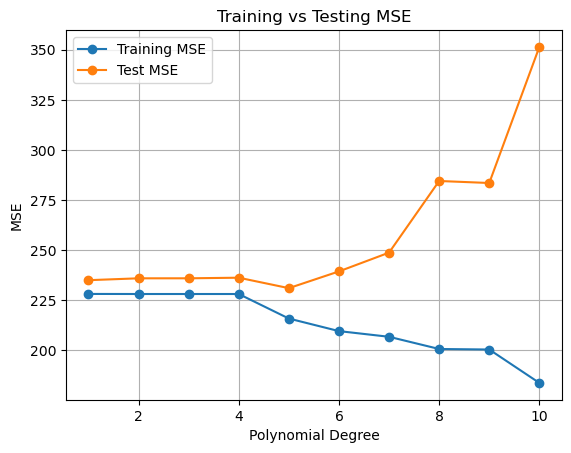

In [96]:
# plot the data
x = [i+1 for i in range(10)]
plt.plot(x, train_list, label='Training MSE', marker='o')
plt.plot(x, test_list, label='Test MSE', marker='o')
plt.legend()
plt.title('Training vs Testing MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.grid(visible=True)
plt.show()


### 3(b): 
Training MSE is monotonically decreasing in m, where m is the degree of the polynomial. This is because increasing the polynomial degree allows for more felxibility to fit every data point in the training data. Therefore, a higher degree polynomial can more closely fit each training data point than a lower degree polynomial.
Test MSE is nearly, but not quite, monotonically increasing in m. While test MSE increases for higher m usually, it slighlty decreased when moving from a fourth degree to fifth degree polynomial and when moving from an eight to a ninth degree polynomial. The reason that test MSE is usually increasing with higher m is that more flexible models are more prone to overfit on the training data. Higher degree polynomials are more likely to fit on the noise as well as the signals in the training data, so using the weights that fit on the noise of sample data will result in worse predictions when you use a sample with different noise.

### 3(c):
Given the training and testing MSEs above, the best fit model is the fifth degree polynomial. This is the model that achieves the lowest test MSE. Increasing the degree beyond degree five results in overfitting on the training data and fitting the weights and the training data noise.